In [1]:
import os  # Interact with the operating system (file handling, paths, etc.)
import gc  # Manages garbage collection (memory cleanup)
import PIL  # Image processing library (Pillow)
import cv2  # OpenCV for image processing and computer vision
import uuid  # Generate unique identifiers (used for unique filenames)
import shutil  # High-level file operations (copying, moving, deleting)
import random  # Generate random numbers, shuffle data, and sampling
import glob as gb  # Pattern-based file searching (e.g., "*.jpg" for all images)
import numpy as np  # Numerical computing with arrays and matrices
import pandas as pd  # Data handling with structured DataFrames
import tensorflow as tf  # Deep learning framework for building models
import matplotlib.pyplot as plt  # Data visualization (plots, graphs, image display)

from PIL import Image  # Handling and processing image files
from tqdm import tqdm  # Display progress bars for loops
from scipy.special import gamma  # Gamma function used in probability and statistics

import keras  # High-level neural network API within TensorFlow
from keras.optimizers import *  # Various optimizers (Adam, SGD, RMSprop, etc.)
from keras.regularizers import l1_l2  # Regularization techniques (L1/L2) to prevent overfitting
from keras.utils import to_categorical  # Converts class labels to one-hot encoding
from keras.callbacks import EarlyStopping  # Stops training early if validation loss increases
from keras.models import Sequential, Model  # Model architectures (Sequential = linear, Model = flexible)
from keras.layers import Dense, Dropout, Input  # Fully connected layers, dropout for regularization, input layer
from keras.layers import GlobalAveragePooling2D  # Replaces fully connected layers to reduce parameters
from keras.callbacks import LearningRateScheduler  # Dynamically adjust learning rate during training
from keras.layers import Conv2D, MaxPool2D, BatchNormalization  # CNN layers for feature extraction & normalization

from tensorflow.keras.metrics import *  # Model evaluation metrics (accuracy, precision, recall, etc.)
from tensorflow.keras.callbacks import *  # Various training callbacks (checkpointing, early stopping)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Augments images (rotation, zoom, flip, etc.)

from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.utils import shuffle  # Shuffles data to prevent learning order biases

2025-06-12 14:44:55.381728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749739495.394982  132818 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749739495.399100  132818 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749739495.410235  132818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749739495.410245  132818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749739495.410247  132818 computation_placer.cc:177] computation placer alr

In [6]:
path = "/home/swanjohi/dual-view/jpeg"

for files in os.listdir(path):
    files_dir = os.path.join(path, files)

    if files == 'jpeg':   # to pass 6774 files 
        pass
    else:
        for file in os.listdir(files_dir):
            print(file)

#Looping through each file/Folder and Ignore the folder named 'jpeg' and loop through the remaining files.

2-247.jpg
1-018.jpg
1-161.jpg
2-139.jpg
1-184.jpg
1-103.jpg
1-253.jpg
1-027.jpg
1-142.jpg
2-143.jpg
2-005.jpg
1-004.jpg
1-009.jpg
1-075.jpg
2-026.jpg
2-266.jpg
1-288.jpg
2-166.jpg
1-165.jpg
1-016.jpg
1-096.jpg
2-074.jpg
1-260.jpg
2-150.jpg
1-172.jpg
2-030.jpg
1-029.jpg
1-067.jpg
2-083.jpg
1-275.jpg
1-187.jpg
1-030.jpg
2-239.jpg
1-261.jpg
1-002.jpg
1-135.jpg
2-287.jpg
2-032.jpg
1-033.jpg
2-109.jpg
1-131.jpg
1-219.jpg
2-136.jpg
1-196.jpg
1-033.jpg
1-234.jpg
2-082.jpg
1-104.jpg
1-250.jpg
1-174.jpg
2-282.jpg
1-109.jpg
2-087.jpg
1-247.jpg
2-153.jpg
1-045.jpg
1-250.jpg
1-025.jpg
1-010.jpg
2-288.jpg
1-229.jpg
2-207.jpg
1-156.jpg
1-203.jpg
1-166.jpg
2-167.jpg
1-137.jpg
2-245.jpg
2-231.jpg
1-253.jpg
1-204.jpg
2-183.jpg
1-259.jpg
1-241.jpg
1-147.jpg
2-220.jpg
1-241.jpg
2-066.jpg
1-088.jpg
2-001.jpg
1-000.jpg
1-012.jpg
1-174.jpg
2-152.jpg
1-204.jpg
1-231.jpg
2-207.jpg
1-211.jpg
1-295.jpg
2-103.jpg
2-283.jpg
1-005.jpg
1-175.jpg
2-174.jpg
1-048.jpg
2-156.jpg
1-204.jpg
1-109.jpg
2-140.jpg
1-168.jpg


In [7]:
dicom_df = pd.read_csv("/home/swanjohi/dual-view/csv/dicom_info.csv")

In [21]:
dicom_df.head(3)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0


In [9]:
dicom_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccessionNumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BitsAllocated,10237.0,1.321246e+01,3.812001,8.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,1.600000e+01
BitsStored,10237.0,1.321246e+01,3.812001,8.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,1.600000e+01
Columns,10237.0,2.179893e+03,1374.221082,6.800000e+01,4.530000e+02,2.728000e+03,3.112000e+03,5.431000e+03
ContentDate,10237.0,2.016047e+07,111.049745,2.016041e+07,2.016043e+07,2.016050e+07,2.016050e+07,2.017092e+07
ContentTime,10237.0,1.230613e+05,11391.443116,8.275551e+04,1.137396e+05,1.229359e+05,1.322114e+05,1.605079e+05
HighBit,10237.0,1.221246e+01,3.812001,7.000000e+00,7.000000e+00,1.500000e+01,1.500000e+01,1.500000e+01
InstanceNumber,10237.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
LargestImagePixelValue,10237.0,4.261229e+04,30995.808636,2.550000e+02,2.550000e+02,6.553500e+04,6.553500e+04,6.553500e+04
PatientBirthDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [11]:
dicom_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [8]:
dicom_df.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [12]:
matr_df = pd.read_csv("/home/swanjohi/dual-view/csv/mass_case_description_train_set.csv")
matr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [13]:
matr_df.head(3)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...


In [ ]:
matr_df.describe().T

In [14]:
catr_df = pd.read_csv("/home/swanjohi/dual-view/csv/calc_case_description_train_set.csv")
catr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [15]:
catr_df.head(3)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...


In [16]:
catr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
breast density,1546.0,2.663648,0.937219,1.0,2.0,3.0,3.0,4.0
abnormality id,1546.0,1.415265,0.903571,1.0,1.0,1.0,1.0,7.0
assessment,1546.0,3.258732,1.229231,0.0,2.0,4.0,4.0,5.0
subtlety,1546.0,3.411384,1.179754,1.0,3.0,3.0,4.0,5.0


In [16]:
mate_df = pd.read_csv("/home/swanjohi/dual-view/csv/mass_case_description_test_set.csv")
mate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [17]:
mate_df.head(3)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...


In [18]:
mate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
breast_density,378.0,2.396825,0.859455,1.0,2.0,2.0,3.0,4.0
abnormality id,378.0,1.092593,0.398136,1.0,1.0,1.0,1.0,4.0
assessment,378.0,3.534392,1.343076,0.0,3.0,4.0,4.0,5.0
subtlety,378.0,3.785714,1.171776,1.0,3.0,4.0,5.0,5.0


In [19]:
cate_df = pd.read_csv("/home/swanjohi/dual-view/csv/calc_case_description_test_set.csv")
cate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [17]:
cate_df.head(3)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [18]:
cate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
breast density,326.0,2.696319,0.909667,0.0,2.0,3.0,3.0,4.0
abnormality id,326.0,1.214724,0.529061,1.0,1.0,1.0,1.0,5.0
assessment,326.0,3.453988,1.188159,0.0,2.0,4.0,4.0,5.0
subtlety,326.0,3.319018,1.188175,1.0,3.0,3.0,4.0,5.0


In [20]:
meta_df = pd.read_csv("/home/swanjohi/dual-view/csv/meta.csv")
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


In [25]:
meta_df.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [26]:
meta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriesNumber,6775.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Visibility,6775.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ImageCount,6775.0,1.511292,0.499909,1.0,1.0,2.0,2.0,2.0


dicom contains Cropped images, ROI Mask Images, Mammogram Images 

In [22]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [23]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [24]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [26]:
# # delete dicom_df after finished use it
del dicom_df;    gc.collect()

734

In [30]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [31]:
def plot_samples(sample, row=40, col=40):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:10]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,10,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

In [32]:
correct_dir = "/home/swanjohi/dual-view/jpeg"

In [33]:
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)


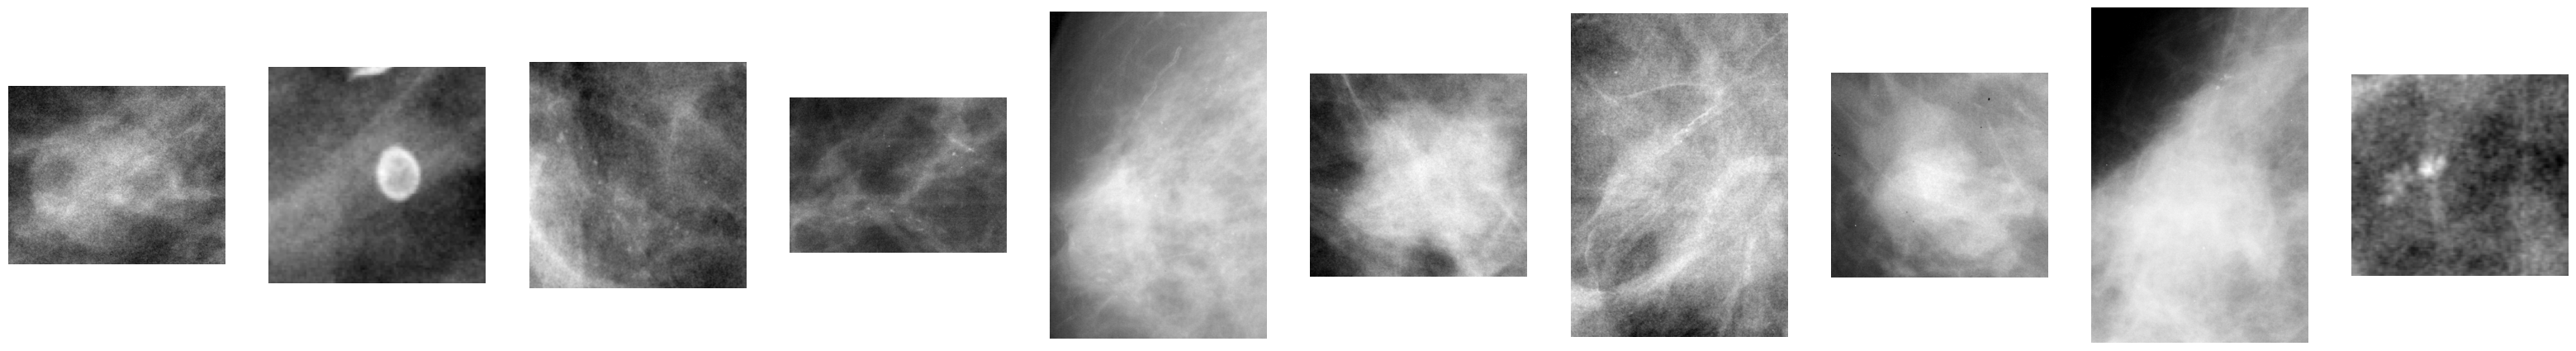

In [34]:
plot_samples(cropped_images, 40,40)

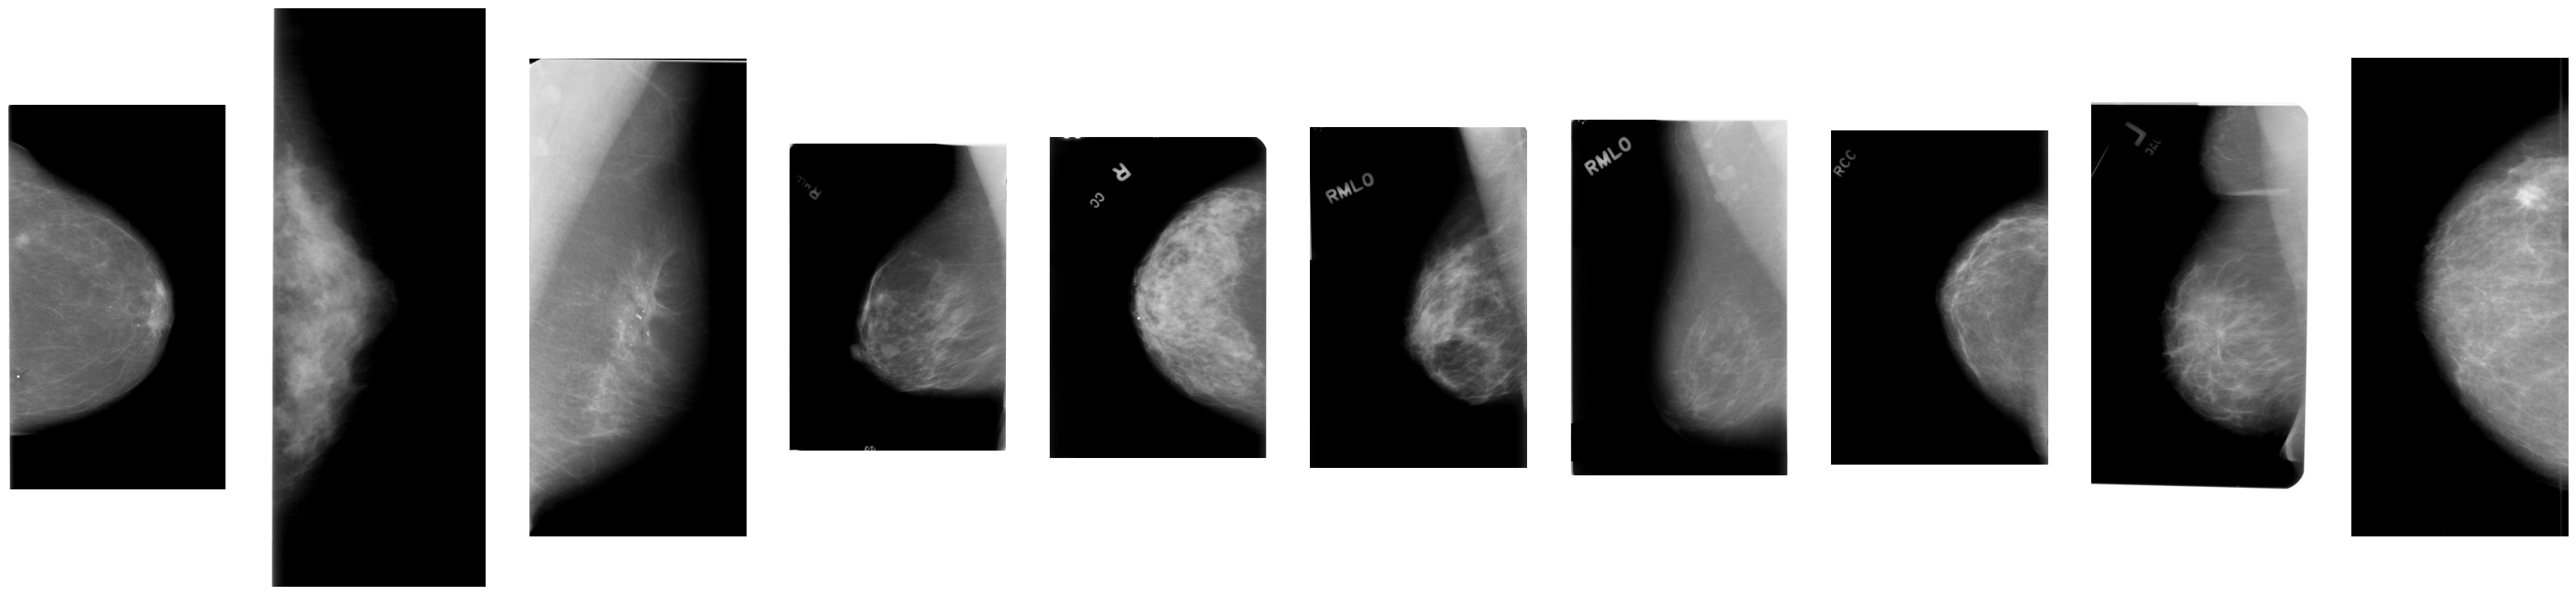

In [35]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
plot_samples(full_mammogram, 40,40)

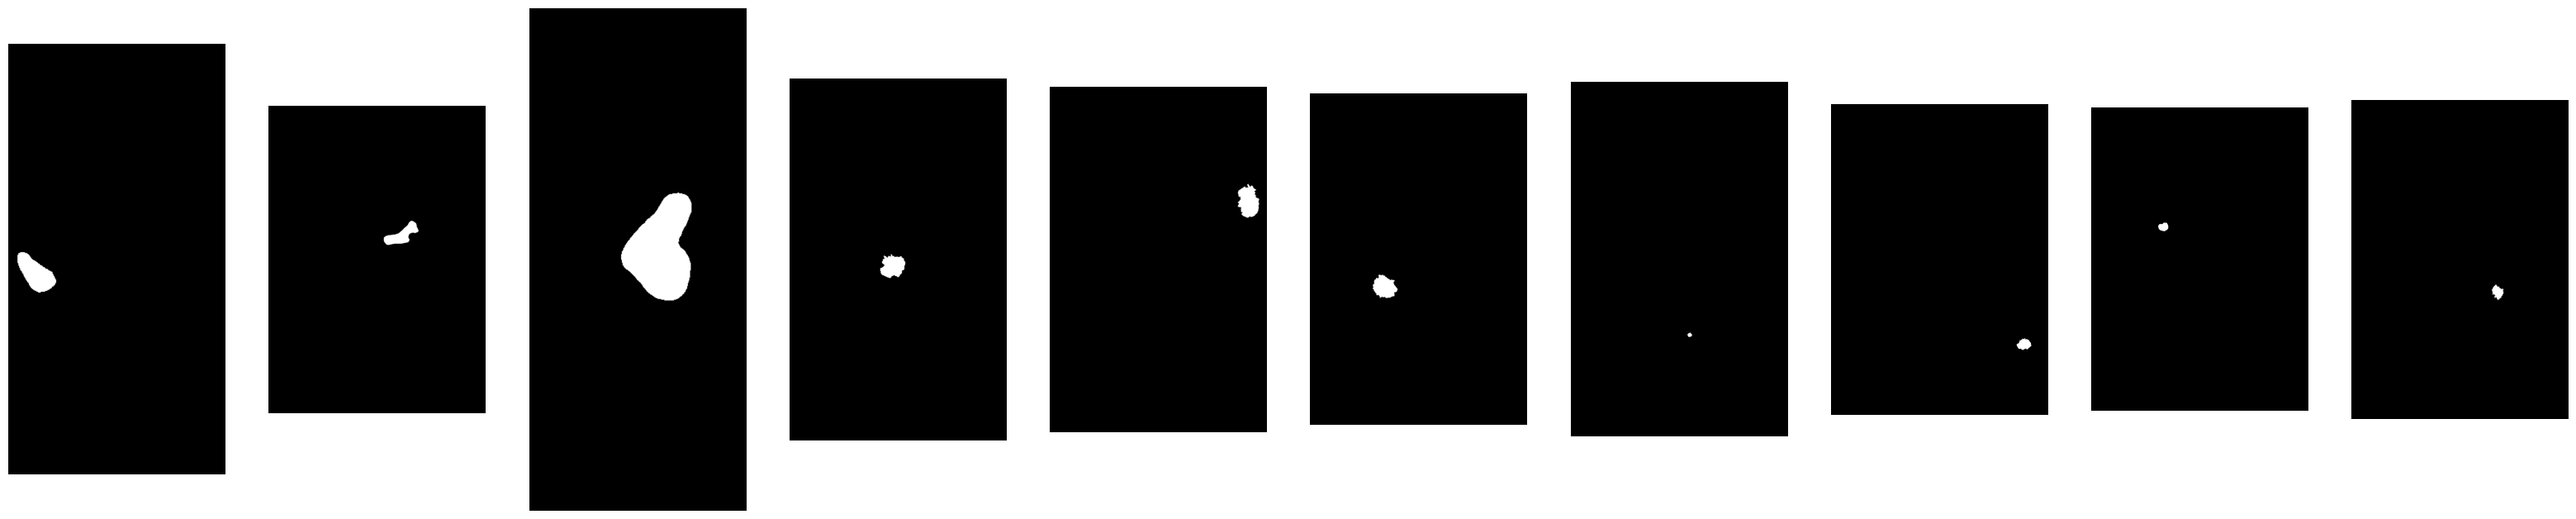

In [37]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
plot_samples(roi_mask, 40,40)

In [38]:
def get_image_file_name(data, new_dict):
    for dicom in data:
        key = dicom.split('/')[4]
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [39]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 1
the length of dataset ==> 1
the length of dataset ==> 1


In [42]:
print("Number of cropped images:", len(cropped_images))
print("Number of full mammogram images:", len(full_mammogram))
print("Number of ROI mask images:", len(roi_mask))

Number of cropped images: 3567
Number of full mammogram images: 2857
Number of ROI mask images: 3247


In [ ]:
del cropped_images, full_mammogram, roi_mask;    gc.collect()

In [ ]:
def fix_image_path(data):
    for indx, image in enumerate(data.values):
        img_name = image[11].split('/')[2]
        if img_name in full_mammo_dict:
            data.iloc[indx, 11] = full_mammo_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[12].split('/')[2]
        if img_name in cropped_images_dict:
            data.iloc[indx, 12] = cropped_images_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[13].split('/')[2]
        if img_name in roi_img_dict:
            data.iloc[indx, 13] = roi_img_dict[img_name]
        else:
            data.iloc[indx, 13] = None

In [ ]:
fix_image_path(matr_df)

In [ ]:
matr_df = matr_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
matr_df.head(5)

In [ ]:
matr_df.pathology.unique()

In [ ]:
fix_image_path(mate_df)

In [ ]:
mate_df= mate_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
mate_df.head()

In [ ]:
fix_image_path(catr_df)

In [ ]:
catr_df= catr_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
catr_df.head()

In [ ]:
fix_image_path(cate_df)

In [ ]:
cate_df = cate_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
cate_df.head()

In [ ]:
def display_images(dataset, column, number):
    fig, axes = plt.subplots(1, number, figsize=(15, 5))
    for index, (i, row) in enumerate(dataset.head(number).iterrows()):
        image_path = row[column]
        if image_path is None or not os.path.exists(image_path):
            continue
        
        image = cv2.imread(image_path)
        
        if image is None:
            continue
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax = axes[index]
        ax.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
        print(np.array(image).shape)
    
    plt.tight_layout()
    plt.show()

In [ ]:
print('Full Mammograms:\n')
display_images(matr_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(matr_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(matr_df, 'ROI_mask_file_path', 5)

In [ ]:
print('Full Mammograms:\n')
display_images(mate_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(mate_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(mate_df, 'ROI_mask_file_path', 5)

In [ ]:
print('Full Mammograms:\n')
display_images(catr_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(catr_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(catr_df, 'ROI_mask_file_path', 5)

In [ ]:
print('Full Mammograms:\n')
display_images(cate_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(cate_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(cate_df, 'ROI_mask_file_path', 5)

In [ ]:
calc_dataset = pd.concat([catr_df, cate_df], axis=0)

In [ ]:
del matr_df,mate_df, catr_df, cate_df;    gc.collect()

In [ ]:
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [ ]:
target_size = (224, 224, 3) #The height and width of the image (in pixels).The number of color channels (RGB → Red, Green, Blue).

In [ ]:
# maps pathology labels to numerical values, and extracts valid image paths and their corresponding labels.
calc_dataset['labels'] = calc_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)

calc_images = np.array(calc_dataset[calc_dataset["image_file_path"].notna()]["image_file_path"].tolist())
calc_labels = np.array(calc_dataset[calc_dataset["image_file_path"].notna()]["labels"].tolist())

In [ ]:
full_labels_series = pd.Series(calc_labels)

# Count the occurrences of each class
label_counts = full_labels_series.value_counts()

# Assuming 0 = benign and 1 = malignant
benign_count = label_counts.get(0, 0)
malignant_count = label_counts.get(1, 0)

print(f"Benign images: {benign_count}")
print(f"Malignant images: {malignant_count}")

In [ ]:
def images_count():
    zero_class_count = len(os.listdir("/kaggle/working/merged_images/0"))
    one_class_count  = len(os.listdir("/kaggle/working/merged_images/1"))

    print(f"Number of images in class 0: {zero_class_count}")
    print(f"Number of images in class 1: {one_class_count}")

In [ ]:
#data augmentation techniques to an image using TensorFlow's tf.image module. Data augmentation artificially increases dataset diversity by applying random transformations, making the model more robust and generalized.
def augment_image(image):
    # Apply data augmentation using tf.image functions
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image

# Function to resize image to (224, 224, 3)
def resize_image(image_tensor):
    return tf.image.resize(image_tensor, [224, 224])

# Function to balance classes by augmenting images
def copy_images_with_unique_filenames(images, labels, source, destination, target_count=None):
    
    benign_images = 0
    malignant_images = 0
    skipped_images = []

    # Create the destination subfolders '0' and '1'
    category_dest_dir_zero = os.path.join(destination, '0')
    os.makedirs(category_dest_dir_zero, exist_ok=True)

    category_dest_dir_one = os.path.join(destination, '1')
    os.makedirs(category_dest_dir_one, exist_ok=True)

    benign_images_list = []
    malignant_images_list = []

    for i, (image, label) in enumerate(zip(images, labels)):
        if os.path.exists(image):
            try:
                # Generate a unique filename
                filename = os.path.basename(image)
                unique_filename = f"{uuid.uuid4().hex}_{filename}"
        
                # Open the image using PIL
                with Image.open(image) as img:
                    # Convert the image to RGB mode (for saving as JPEG)
                    img = img.convert('RGB')
                    # Augment the image (convert it to a Tensor first)
                    img_tensor = tf.convert_to_tensor(img)
                    # Resize the image to (224, 224, 3)
                    resized_img_tensor = resize_image(img_tensor)
                    augmented_image_tensor = augment_image(resized_img_tensor)
                    # Convert Tensor back to PIL image for saving
                    augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)

                    if label == 0:
                        benign_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_zero, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        benign_images += 1

                    elif label == 1:
                        malignant_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_one, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        malignant_images += 1

            except Exception as e:
                print(f"Error copying image {image}: {e}")
                skipped_images.append(image)
        else:
            print(f"Image not found: {image}")
            skipped_images.append(image)

    # If balancing is needed, duplicate/augment images from the smaller class
    benign_count = len(benign_images_list)
    malignant_count = len(malignant_images_list)

    if benign_count < malignant_count:
        augment_and_save_images(benign_images_list, category_dest_dir_zero, malignant_count - benign_count)

    elif malignant_count < benign_count:
        augment_and_save_images(malignant_images_list, category_dest_dir_one, benign_count - malignant_count)
    print("data balancing")
    images_count()
    augment_and_save_images(benign_images_list, category_dest_dir_zero, target_count)
    augment_and_save_images(malignant_images_list, category_dest_dir_one, target_count)
    print("data augmentation")
    images_count()
    
    print(f"\nCopying complete.")
    print(f"Benign images copied (label 0): {benign_images}")
    print(f"Benign count (label 0): {benign_count}")
    print(f"Malignant images copied (label 1): {malignant_images}")
    print(f"Malignant count (label 1): {malignant_count}")
    print(f"Total skipped images: {len(skipped_images)}")
    if skipped_images:
        print("Skipped images:")
        for img in skipped_images:
            print(img)
            
    del skipped_images, benign_images_list, malignant_images_list
    gc.collect()

# Function to augment and save images to balance the dataset
def augment_and_save_images(images_list, destination_dir, num_augments):
    for i in range(num_augments):
        img_name = random.choice(images_list)
        abs_path = os.path.join(destination_dir, img_name)

        try:
            with Image.open(abs_path) as img:
                img = img.convert('RGB')
                # Augment the image
                img_tensor = tf.convert_to_tensor(img)
                # Resize the image
                augmented_image_tensor = augment_image(img_tensor)
                # Convert Tensor back to PIL image for saving
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)
                # Remove the original extension from img_name 1-285.jpg --> 1-285
                img_name_without_ext = os.path.splitext(img_name)[0]
                # Save augmented image with a unique name
                augmented_image.save(os.path.join(destination_dir, img_name_without_ext + f'_aug{i}.jpg'), 'JPEG')
        except Exception as e:
            print(f"Error augmenting image {abs_path}: {e}")

# Example usage
source_dir = "/kaggle/input/mias-mammography/all-mias"
destination_dir = "/kaggle/working/merged_images"

# target_count=0 meaning no Augmentation, There's just Data-Balance
target_count = int((len(calc_labels) * 5) // 2)
copy_images_with_unique_filenames(calc_images, calc_labels, source_dir, destination_dir, target_count)

In [ ]:
data_dir = '/kaggle/working/merged_images'  # Update with your dataset path

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    # image_size=(224, 224),
    image_size=(224, 224),
    seed=30,
    shuffle=True,
    batch_size=13  # Set your desired batch size
)

In [ ]:
for images, labels in full_dataset.take(1):  # Take the first batch
    print("Shape of Images:", images.shape)  # Should be (batch_size, 224, 224, 3)
    print("Shape of Labels:", labels.shape)  # Should be (batch_size, number_of_classes)
    
    # Print first 5 label values
    print("\nFirst 10 Labels (One-Hot Encoded):\n", labels.numpy()[:10])
    
    # Display some images with their labels
    plt.figure(figsize=(10, 5))
    for i in range(min(10, len(images))): 
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.axis("off")
    plt.show()

In [ ]:
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Step 3: Split the dataset into train, validation, and test sets
train_size = int(0.8* total_samples)                 # 80% for training
test_size = total_samples - train_size                # 20% for testing

# Create train, validation, and test datasets
train_dataset       = full_dataset.take(train_size)
test_dataset        = full_dataset.skip(train_size)

# Prefetch to Improve Performance
train_dataset      = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset       = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(8) ==> {train_size*13}")
print(f"Test samples:       {test_size}      batches(8) ==> {test_size*13}")

In [ ]:
def check_missing_samples(dataset, dataset_name):
    missing_count = 0
    for batch, labels in dataset:
        batch_nan = np.any(np.isnan(batch.numpy()))  # Check if any image has NaN values
        label_nan = np.any(np.isnan(labels.numpy()))  # Check if any label is NaN
        
        if batch_nan or label_nan:
            missing_count += 1
    
    print(f"{dataset_name}: Found {missing_count} batches with missing values")

# Check both training and test datasets
check_missing_samples(train_dataset, "Train Dataset")
check_missing_samples(test_dataset, "Test Dataset")

In [ ]:
#applies a negative transformation to medical images (benign & malignant cases) and saves them in a new directory.
#The negative transformation helps enhance contrast and highlight subtle patterns,


# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
Neg_dir = '/kaggle/working/Negative_Images'

# Create the output directory if it doesn't exist
os.makedirs(Neg_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

for subdir in subdirs:
    # Create a corresponding subdirectory in the output directory
    os.makedirs(os.path.join(Neg_dir, subdir), exist_ok=True)
    
    # Define the path to the current subdirectory
    current_dir = os.path.join(data_dir, subdir)
    
    # Loop through all images in the current subdirectory
    for filename in os.listdir(current_dir):
        # Construct the full file path
        file_path = os.path.join(current_dir, filename)
        
        # Read the image
        image = cv2.imread(file_path)
        
        # Check if the image was loaded successfully
        if image is not None:
            # Convert to grayscale (if necessary)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Apply negative transformation
            negative_image = 255 - gray_image
            
            # Save the negative image in the corresponding output directory
            output_file_path = os.path.join(Neg_dir, subdir, filename)
            cv2.imwrite(output_file_path, negative_image)
        else:
            print(f"Warning: Could not read image {file_path}")

print("Negative transformation applied and images saved successfully.")

In [ ]:
#Verifies that negative images were correctly processed
#Ensures the images are properly stored in their respective directories (0 = Benign, 1 = Malignant)
#Helps identify errors or incorrect image transformations
#Useful for sanity checks before training ResNet50 on negative images

import random


# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Negative Images')
    plt.show()

# Display one random sample from the output directory
display_random_samples(Neg_dir, subdirs)

In [ ]:
pip install scikit-image

In [ ]:
#Enhances contrast in medical images (especially mammograms).
#Makes tumors, tissues, and patterns more visible.
#Prepares preprocessed images for ResNet50 training.
#Ensures equal brightness across different regions (compared to standard histogram equalization).

from skimage import exposure

# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
AHE_dir = '/kaggle/working/AHistogram_Images'

# Create the output directory if it doesn't exist
os.makedirs(AHE_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

# Function to apply Adaptive Histogram Equalization and save images
def apply_adaptive_histogram_equalization(data_dir, output_dir):
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Loop through all images in the current subdirectory
        for filename in os.listdir(current_dir):
            # Construct the full file path
            file_path = os.path.join(current_dir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Apply Adaptive Histogram Equalization
                image_adapteq = exposure.equalize_adapthist(gray_image, clip_limit=0.03)
                
                # Convert the image back to uint8 format (0-255)
                image_adapteq = (image_adapteq * 255).astype(np.uint8)
                
                # Save the equalized image in the corresponding output directory
                output_file_path = os.path.join(output_dir, subdir, filename)
                cv2.imwrite(output_file_path, image_adapteq)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply the transformation
apply_adaptive_histogram_equalization(data_dir, AHE_dir)

In [ ]:
# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Adaptive Histogram Equalization Images')
    plt.show()


# Display one random sample from the output directory
display_random_samples('/kaggle/working/AHistogram_Images', subdirs)

In [ ]:
def display_images():
    # Get the image names from the merged images directory
    image_names = [f for f in os.listdir('/kaggle/working/merged_images/1') if f.endswith(('.jpg', '.png'))][:5]

    # Create subplots for 5 images and 3 columns (original, Negative , Adaptive histogram equalized)
    fig, axs = plt.subplots(5, 3, figsize=(10, 15))

    for i, image_name in enumerate(image_names):
        # Get the full paths to the images
        image_path1 = os.path.join('/kaggle/working/merged_images/1', image_name)  # Original Image
        image_path2 = os.path.join('/kaggle/working/Negative_Images/1', image_name)  # Negative Image
        image_path3 = os.path.join('/kaggle/working/AHistogram_Images/1', image_name)  # Adaptive Histogram Equalized Image

        # Open the images
        image1 = Image.open(image_path1).convert('L')  # Convert to grayscale for original
        image2 = Image.open(image_path2)
        image3 = Image.open(image_path3)

        # Display the images in the subplots
        axs[i, 0].imshow(image1, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title('Original Image')

        axs[i, 1].imshow(image2, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title('Negative Image')

        axs[i, 2].imshow(image3, cmap='gray')
        axs[i, 2].axis('off')
        axs[i, 2].set_title('Adaptive Histogram Equalized Image')

    plt.tight_layout()
    plt.show()

display_images()

In [ ]:
from skimage import feature

# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
output_dir = '/kaggle/working/Hog_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

def apply_hog_and_save(data_dir, output_dir):
    # Iterate through each subdirectory
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Get the list of image files in the current subdirectory
        image_files = os.listdir(current_dir)
        
        # Process each image file
        for filename in image_files:
            # Prepare the full path for the image
            file_path = os.path.join(current_dir, filename)
            output_path = os.path.join(output_dir, subdir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Compute HOG features
                hog_features, hog_image = feature.hog(
                    gray_image,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True
                )
                
                # Scale the HOG image for better visualization
                hog_image = (hog_image * 255).astype(np.uint8)
                
                # Save the HOG image
                cv2.imwrite(output_path, hog_image)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

In [ ]:
import random


# Function to display one random sample image from each category
def display_random_samplesHog(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG Original  Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHog('/kaggle/working/Hog_Images', subdirs)

In [ ]:
# Define the data directory and the output directory
data_dir = '/kaggle/working/Negative_Images'
output_dir = '/kaggle/working/HogNeg_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

In [ ]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG Negative Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('/kaggle/working/HogNeg_Images', subdirs)

In [ ]:
# Define the data directory and the output directory
data_dir = '/kaggle/working/AHistogram_Images'
output_dir = '/kaggle/working/HogAHE_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully")

In [ ]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG AHE Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('/kaggle/working/HogAHE_Images', subdirs)

In [ ]:
import tensorflow as tf

# Define the data directory
data_dir = '/kaggle/working/merged_images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 80% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 10% for testing

# Create train, validation, and test datasets
train_dataset = full_dataset.take(train_size)
validation_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.metrics import Precision, Recall

def create_modelCNN(input_shape=(224, 224, 3)):
    """Create and compile a CNN model for binary classification."""
    # Initialize the Sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Input(shape=input_shape))  # Input layer for RGB images
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Another Dropout layer
    model.add(Dense(2, activation='softmax'))  # Output layer for classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

    return model

In [ ]:
import tensorflow as tf

# Define the data directory
data_dir = '/kaggle/working/Hog_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_Neg_dataset = full_dataset.take(train_size)
validation_Neg_dataset = full_dataset.skip(train_size).take(val_size)
test_Neg_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_original_dataset = train_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_original_dataset = validation_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_original_dataset = test_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

In [ ]:
model_HOG = create_modelCNN()

Hog_Original = model_HOG.fit(
           trainHOG_original_dataset,
            validation_data= validationHOG_original_dataset, batch_size=13, 
            epochs=10)

In [ ]:
Hog_Original_Result = model_HOG.evaluate(testHOG_original_dataset)

In [ ]:
# Define the data directory
data_dir = '/kaggle/working/HogNeg_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_Neg_dataset = full_dataset.take(train_size)
validation_Neg_dataset = full_dataset.skip(train_size).take(val_size)
test_Neg_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_Neg_dataset = train_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_Neg_dataset = validation_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_Neg_dataset = test_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

In [ ]:
model_HOG_Neg = create_modelCNN()

Hog_Neg = model_HOG_Neg.fit(
            trainHOG_Neg_dataset,
            validation_data= validationHOG_Neg_dataset, batch_size=13, 
            epochs=10
        )

In [ ]:
Hog_Neg_Result = model_HOG_Neg.evaluate(testHOG_Neg_dataset)

In [ ]:
# Define the data directory
data_dir = '/kaggle/working/HogAHE_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_AHE_dataset = full_dataset.take(train_size)
validation_AHE_dataset = full_dataset.skip(train_size).take(val_size)
test_AHE_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_AHE_dataset = train_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_AHE_dataset = validation_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_AHE_dataset = test_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

In [ ]:
model_HOG_AHE = create_modelCNN()

Hog_AHE = model_HOG_AHE.fit(
            trainHOG_AHE_dataset,
            validation_data= validationHOG_AHE_dataset,
            batch_size= 13,
            epochs=10
        )

In [ ]:
Hog_AHE_Result = model_HOG_AHE.evaluate(testHOG_AHE_dataset)

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(Hog_Original.history['accuracy'], label='HOG on Original Accuracy')
plt.plot(Hog_Neg.history['accuracy'], label='HOG on Negative Accuracy')
plt.plot(Hog_AHE.history['accuracy'], label='Hog on AHE Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(Hog_Original.history['val_accuracy'], label='HOG on Original Val Accuracy')
plt.plot(Hog_Neg.history['val_accuracy'], label='HOG on Negative Accuracy')
plt.plot(Hog_AHE.history['val_accuracy'], label='Hog on AHE Accuracy')
plt.title('Validation Accuracy')
plt.legend()

# Loss
plt.subplot(2, 2, 3)
plt.plot(Hog_Original.history['loss'], label='HOG on Original Loss')
plt.plot(Hog_Neg.history['loss'], label='HOG on Negative Loss')
plt.plot(Hog_AHE.history['loss'], label='Hog on AHE Loss')
plt.title('Training Loss')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
plt.plot(Hog_Original.history['val_loss'], label='HOG on Original Val Loss')
plt.plot(Hog_Neg.history['val_loss'], label='HOG on Negative Val Loss')
plt.plot(Hog_AHE.history['val_loss'], label='Hog on AHE Val Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tabulate import tabulate

# Sample results (replace these with your actual results)
accuracy = [Hog_Original_Result[1], Hog_Neg_Result[1], Hog_AHE_Result[1]]
precision = [Hog_Original_Result[2], Hog_Neg_Result[2], Hog_AHE_Result[2]]
recall = [Hog_Original_Result[3], Hog_Neg_Result[3], Hog_AHE_Result[3]]

# Create a DataFrame
data = {
    "Features": ["Histogram of Oriented Gradients (HOG)", "Histogram of Oriented Gradients (HOG)", "Histogram of Oriented Gradients (HOG)"],
    "Image Enhancement": ["Original Image", "Negative Transformer", "Adaptive Histogram Equalization"],
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}

df = pd.DataFrame(data)

# Display the DataFrame in a beautiful format
print("\n---------------------------------------------------------------------------------------------------------\n")
print(tabulate(df, headers='keys', showindex=False))